Importation

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

%matplotlib inline
sns.set(style='whitegrid')


LOAD THE DATASETS

In [6]:
fuel_df = pd.read_csv("fuel_prices_indian_basket.csv")
consumption_df = pd.read_csv("petroleum_consumption_statewise.csv")
vehicle_df = pd.read_csv("VAHAN Vehicle Registrations by Fuel Type_Sample_Data.csv")
print(vehicle_df.head(8))


  Date (date) State Name (state_name)  State Code (state_code)  \
0  2020-04-01               Jharkhand                       20   
1  2023-12-01        Himachal Pradesh                        2   
2  2020-04-01                  Punjab                        3   
3  2022-05-01             Maharashtra                       27   
4  2023-11-01                  Kerala                       32   
5  2022-07-01             Maharashtra                       27   
6  2019-03-01                 Haryana                        6   
7  2023-06-01                 Gujarat                       24   

      RTO Name (office_name) RTO Code (office_code) Fuel Type (fuel_type)  \
0  West Singhbhum (Chaibasa)                    JH6                Diesel   
1                  Rla Mandi                   HP33        Petrol/Ethanol   
2                Sdm Rajpura                   PB39                Petrol   
3                   Baramati                   MH42         Petrol/Hybrid   
4           Nedumang

CLEANING AND PREPARATION

Fuel Price data

In [7]:
fuel_df['Month'] = pd.to_datetime(fuel_df['Month'], format='%b-%y')
fuel_df['Year'] = fuel_df['Month'].dt.year


🔹 Vehicle Registration Data

In [8]:
print(vehicle_df.columns)

# Step 2: Rename columns if needed (based on your original data)
vehicle_df = vehicle_df.rename(columns={
    'Date (date)': 'Date',
    'Registrations (registrations)': 'Registrations'
})

# Step 3: Convert 'Date' to datetime if not already
vehicle_df['Date'] = pd.to_datetime(vehicle_df['Date'])

# Step 4: Create 'Year' column
vehicle_df['Year'] = vehicle_df['Date'].dt.year


Index(['Date (date)', 'State Name (state_name)', 'State Code (state_code)',
       'RTO Name (office_name)', 'RTO Code (office_code)',
       'Fuel Type (fuel_type)', 'Category (category)',
       'Registrations (registrations)'],
      dtype='object')


 Petroleum Consumption Data

In [9]:
consumption_df = consumption_df.drop(columns=['Sl. No.'])
consumption_df.rename(columns={"State/UT/ Product": "State"}, inplace=True)
consumption_long = pd.melt(consumption_df, id_vars=["State"], var_name="Year", value_name="Consumption")
consumption_long['Year'] = consumption_long['Year'].str.extract(r'(\d{4})').astype(int)


Aggregation

In [10]:
vehicle_agg = vehicle_df.groupby('Year')['Registrations'].sum().reset_index()

# Step 6: Rename for clarity
vehicle_agg.rename(columns={'Registrations': 'Total_Registrations'}, inplace=True)
print(vehicle_agg)


   Year  Total_Registrations
0  2019              20870.0
1  2020             191593.0
2  2021            1813446.0
3  2022             106156.0
4  2023              23258.0
5  2024              12462.0


MERGING

In [11]:
merged_df = pd.merge(fuel_df, vehicle_agg, on='Year', how='inner')


VISUALIZATIONS

fuel price trends

In [20]:
print(fuel_df)


       Month  Indian Basket of Crude Oil (Dollar/bbl)  Petrol (Rs./Ltr)  \
0 2018-01-01                                    67.06             71.38   
1 2019-01-01                                    59.27             70.02   
2 2020-01-01                                    64.31             75.01   
3 2021-01-01                                    54.79             84.89   
4 2022-01-01                                    84.67             95.41   

   Diesel (Rs./Ltr)  Year  
0             61.89  2018  
1             64.27  2019  
2             68.14  2020  
3             75.07  2021  
4             86.67  2022  


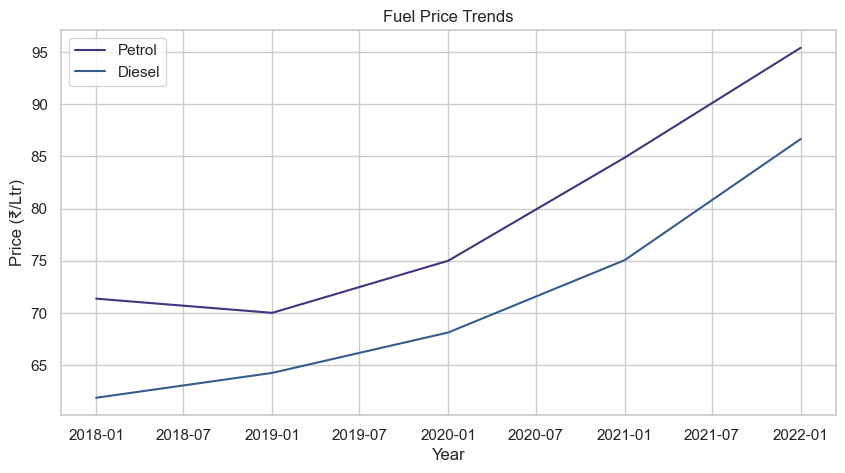

In [35]:

plt.figure(figsize=(10,5))
sns.color_palette("bright6")
sns.lineplot(data=fuel_df, x='Month', y='Petrol (Rs./Ltr)', label='Petrol')
sns.lineplot(data=fuel_df, x='Month', y='Diesel (Rs./Ltr)', label='Diesel')
plt.title("Fuel Price Trends")
plt.xlabel("Year")
plt.ylabel("Price (₹/Ltr)")
plt.legend()
plt.show()


Vehicle registrations over year

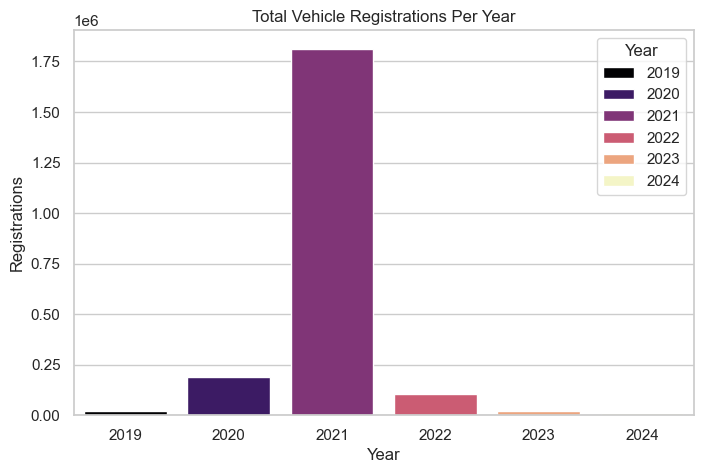

In [37]:
plt.figure(figsize=(8,5))
sns.barplot(data=vehicle_agg, x='Year', y='Total_Registrations', palette='magma', hue="Year", color='red')
plt.title("Total Vehicle Registrations Per Year")
plt.ylabel("Registrations")
plt.show()


Vehicle correlation

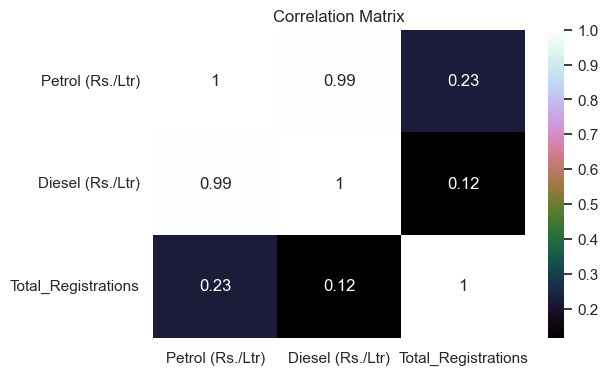

In [56]:
plt.figure(figsize=(6,4))
sns.heatmap(merged_df[['Petrol (Rs./Ltr)', 'Diesel (Rs./Ltr)', 'Total_Registrations']].corr(), annot=True, cmap='cubehelix')
plt.title("Correlation Matrix")
plt.show()


Fuel Prices vs Vehicle Registrations (Dual Axis Plot)

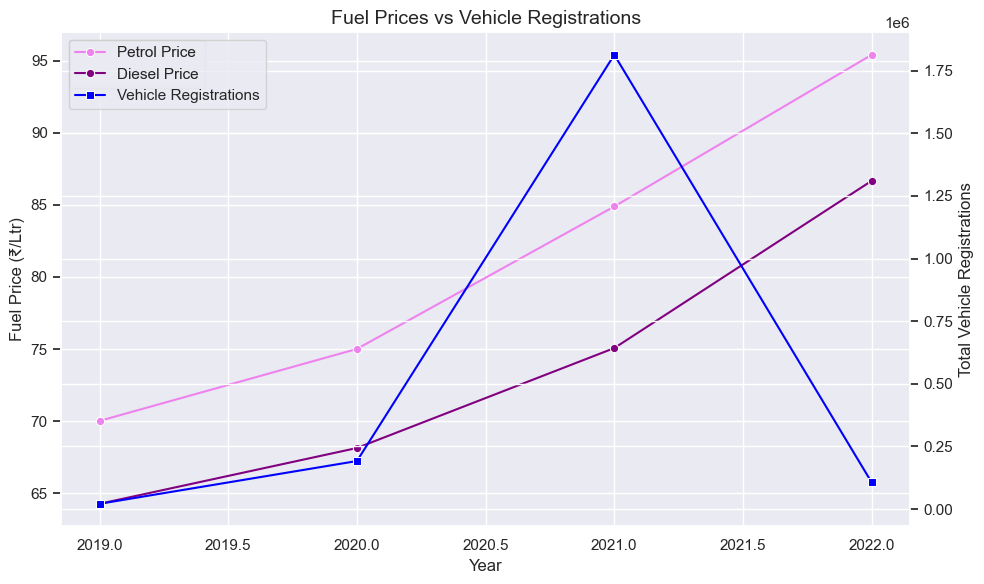

In [77]:
fig, ax1 = plt.subplots(figsize=(10, 6))
sns.set_theme("notebook")
palette = sns.color_palette("mako_r", 6)


# Line plot for fuel prices
sns.lineplot(x='Year', y='Petrol (Rs./Ltr)', data=merged_df, ax=ax1, label='Petrol Price', marker='o', color="violet")
sns.lineplot(x='Year', y='Diesel (Rs./Ltr)', data=merged_df, ax=ax1, label='Diesel Price', marker='o', color="purple")

# Secondary axis for vehicle registrations
ax2 = ax1.twinx()
sns.lineplot(x='Year', y='Total_Registrations', data=merged_df, ax=ax2, label='Vehicle Registrations', marker='s', color="blue")

# Labels
ax1.set_ylabel("Fuel Price (₹/Ltr)", fontsize=12)
ax2.set_ylabel("Total Vehicle Registrations", fontsize=12)
ax1.set_xlabel("Year", fontsize=12)
plt.title("Fuel Prices vs Vehicle Registrations", fontsize=14)

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
plt.legend(lines1 + lines2, labels1 + labels2, loc="upper left")

plt.grid(True)
plt.tight_layout()
plt.show()


Year-wise Breakdown by Fuel Type

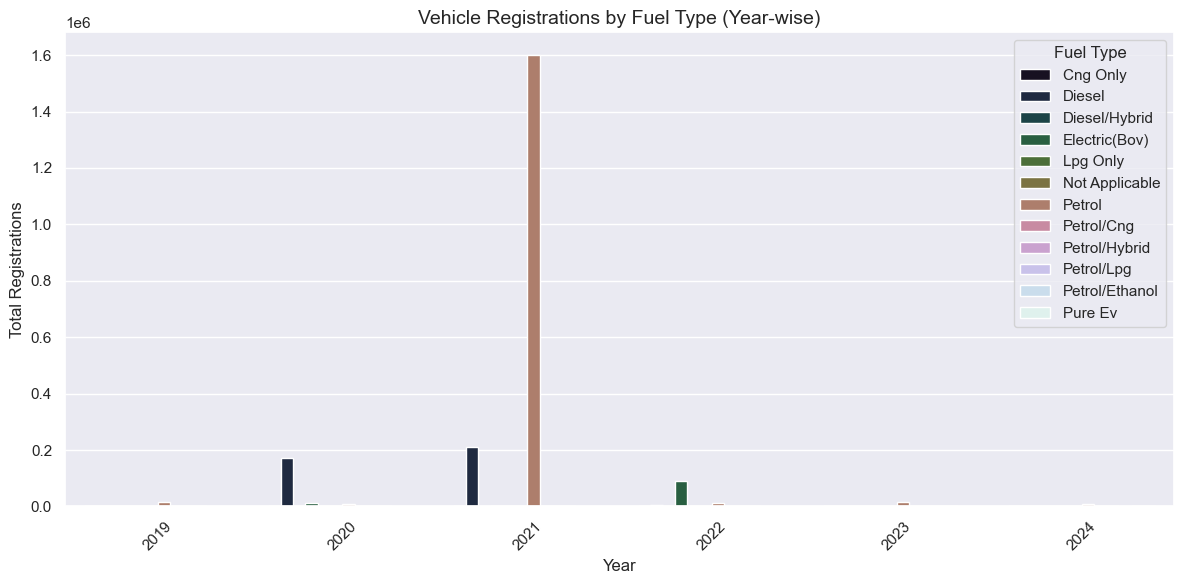

In [88]:
# Group by Year & Fuel Type
fuel_type_grouped = vehicle_df.groupby(['Year', 'Fuel Type (fuel_type)'])['Registrations'].sum().reset_index()


# Plot
plt.figure(figsize=(12,6))
sns.barplot(data=fuel_type_grouped, x='Year', y='Registrations', hue='Fuel Type (fuel_type)', palette="cubehelix")
plt.title("Vehicle Registrations by Fuel Type (Year-wise)", fontsize=14)
plt.ylabel("Total Registrations")
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.legend(title='Fuel Type')
plt.tight_layout()
plt.show()


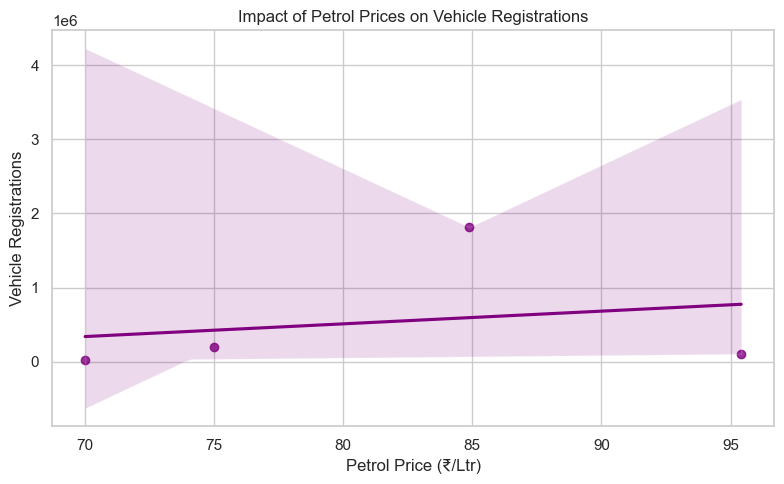

In [ ]:
plt.figure(figsize=(8,5))
sns.regplot(data=merged_df, x='Petrol (Rs./Ltr)', y='Total Registrations', color='purple',)
plt.title("Impact of Petrol Prices on Vehicle Registrations")
plt.xlabel("Petrol Price (₹/Ltr)")
plt.ylabel("Vehicle Registrations")
plt.tight_layout()
plt.show()


CONSUMPTION VS REGISTRAIONS

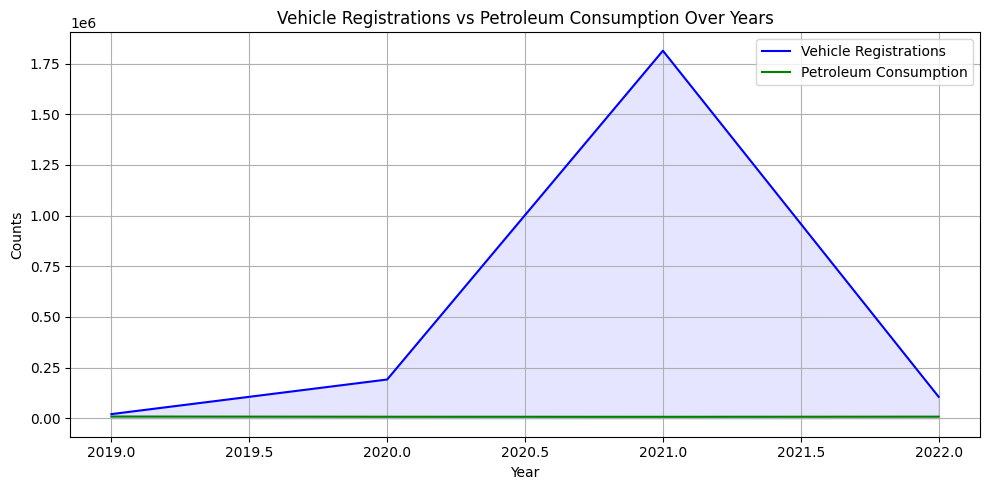

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

consumption_by_year = consumption_long.groupby('Year')['Consumption'].sum().reset_index()
reg_consumed = pd.merge(vehicle_agg, consumption_by_year, on='Year', how='inner')

# Reset style to default
plt.style.use('default')


# Plot
plt.figure(figsize=(10, 5), facecolor='white')

# Line plots
sns.lineplot(data=reg_consumed, x='Year', y='Total_Registrations', label='Vehicle Registrations', color='blue')
sns.lineplot(data=reg_consumed, x='Year', y='Consumption', label='Petroleum Consumption', color='green')

# Fill between for shadow effect
plt.fill_between(reg_consumed['Year'], reg_consumed['Total_Registrations'], alpha=0.1, color='blue')
plt.fill_between(reg_consumed['Year'], reg_consumed['Consumption'], alpha=0.1, color='green')

# Labels
plt.title("Vehicle Registrations vs Petroleum Consumption Over Years")
plt.xlabel("Year")
plt.ylabel("Counts")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


REGRESSION ANALYSIS(PREDICTION)

Prepare data

In [ ]:
X = merged_df[['Petrol (Rs./Ltr)', 'Diesel (Rs./Ltr)']]
y = merged_df['Total_Registrations']


train test-split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Train Linear regression model

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Prediction and evaluaion 

In [ ]:
y_pred = model.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

# Coefficients
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)


R2 Score: -2547.2920798575847
Mean Squared Error: 4650302385093.467
                    Coefficient
Petrol (Rs./Ltr)  112616.758574
Diesel (Rs./Ltr)   10922.666667


Predict Vehicle Registrations for custom price

In [ ]:
# Example: Predict when petrol = ₹100, diesel = ₹90
example = pd.DataFrame({'Petrol (Rs./Ltr)': [100], 'Diesel (Rs./Ltr)': [90]})
predicted = model.predict(example)
print("Predicted Registrations:", predicted[0])


Predicted Registrations: 3678160.6353911664


Forecasting Total Vehicle Registrations


In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Example: Sample yearly total registrations data (replace with your actual data)
# You should have a DataFrame like this:
# Year | Total Registrations
vehicle_data = {
    'Year': [2018, 2019, 2020, 2021, 2022],
    'Total Registrations': [12000000, 13000000, 13500000, 14500000, 15000000]
}
df = pd.DataFrame(vehicle_data)

# Model training
X = df[['Year']]
y = df['Total Registrations']
model = LinearRegression()
model.fit(X, y)

# Forecast for future years
future_years = pd.DataFrame({'Year': [2023, 2024, 2025]})
future_predictions = model.predict(future_years)

# Combine historical and predicted data
forecast_df = pd.concat([
    df.set_index('Year'),
    pd.DataFrame({'Total Registrations': future_predictions}, index=future_years['Year'])
])


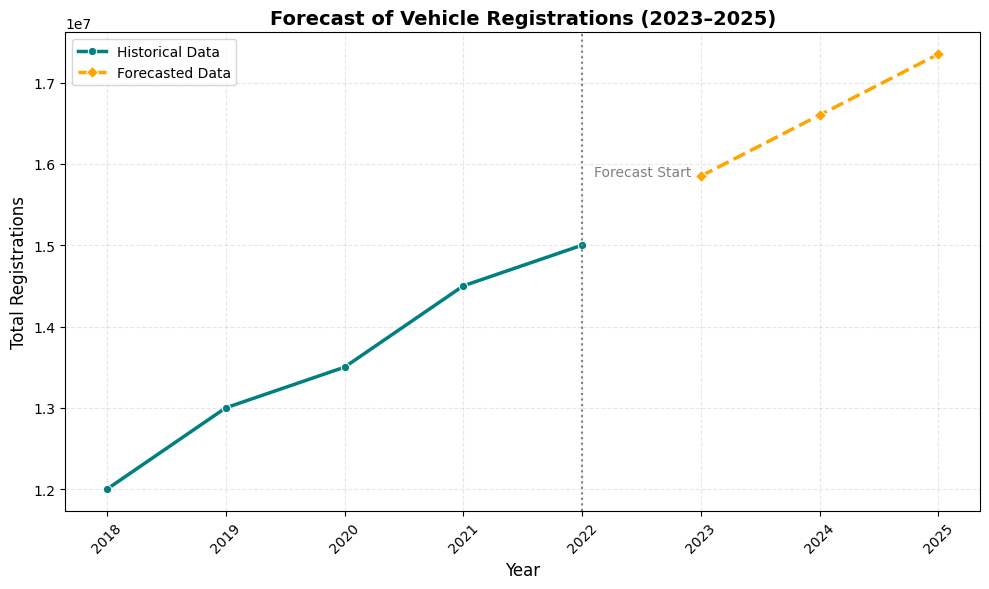

In [ ]:
# Split data into historical and forecasted parts
historical = forecast_df[forecast_df.index <= 2022]
future = forecast_df[forecast_df.index > 2022]

plt.figure(figsize=(10, 6))

# Plot historical data
sns.lineplot(x=historical.index, y=historical['Total Registrations'], label='Historical Data',
             marker='o', color='teal', linewidth=2.5)

# Plot forecasted data
sns.lineplot(x=future.index, y=future['Total Registrations'], label='Forecasted Data',
             marker='D', color='orange', linewidth=2.5, linestyle='--')

# Highlight forecast start
plt.axvline(x=2022, color='gray', linestyle=':', linewidth=1.5)
plt.text(2022 + 0.1, future['Total Registrations'].min(), "Forecast Start", color='gray')

# Labels and styling
plt.title("Forecast of Vehicle Registrations (2023–2025)", fontsize=14, weight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Registrations", fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.3)
plt.legend()
plt.xticks(forecast_df.index, rotation=45)
plt.tight_layout()
plt.show()
